In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import yfinance as yf
from scipy.signal import argrelextrema
# from collections import deque
# from matplotlib.lines import Line2D
import pandas_ta as ta
import ccxt
from datetime import datetime, timedelta
# import plotly.graph_objects as go
# import inspect 
import os
import ccxt_data_fetch

pd.set_option('display.max_rows', 50)



In [3]:

# exchange = ccxt.binance()

# # exchange = ccxt.binance({
# #     'enableRateLimit': True,
# # })


# # exchange.enableRateLimit = True 
# exchange.load_markets()

# symbols = exchange.symbols


# # ticker = 'BTC-USDT'
# # timeframe ='4h'
# # use bars[:-1] to avoid false signal espeacially in current candle
# # because ccxt gives the ongoing candle before they close
# # do bars[:-3] to get less trades; but better quality
# def ccxt_data(symbol='ETH/USDT', timeframe ='4h', limit=111):
#     global data
#     # global fullname

#     m_symbol = symbol.replace("/","_")
#     outname = m_symbol+'_'+timeframe+'_'+f'{limit}'+'.csv'
#     outdir=os.getcwd()+f'/data/{timeframe}'
#     fullname = os.path.join(outdir, outname)    

#     if not os.path.exists(outdir):
#         os.mkdir(outdir)

#     if not (os.path.exists(fullname)):

#         bars = exchange.fetch_ohlcv(symbol, timeframe=timeframe, limit=limit)
#         # must use bars[:-1] because arrgrelextrema will see the last candle wich have not closed yet
#         data = pd.DataFrame(bars[:], columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
#         data['Time'] = pd.to_datetime(data['Time'], unit='ms')
#         data.set_index('Time', inplace=True)

#         data.to_csv(fullname) 
#         print('fetching new data', symbol)
    
#     else:
#         tem_data = pd.read_csv(fullname, index_col='Time')
#         # last_candle_time=tem_data['Time'].max()
#         last_candle_time_plus=pd.to_datetime(tem_data.index[-1]) + pd.Timedelta(12, unit="h")
#         if (last_candle_time_plus) >= pd.to_datetime(datetime.now()) :
#             data = tem_data
#         else:
#             bars = exchange.fetch_ohlcv(symbol, timeframe=timeframe, limit=limit)
#             data = pd.DataFrame(bars[:], columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
#             data['Time'] = pd.to_datetime(data['Time'], unit='ms')
#             data.set_index('Time', inplace=True)

#             data.to_csv(fullname)
#             print('updating data ',symbol)
            
   
#     return data

exchange = ccxt.binance()

# exchange = ccxt.binance({
#     'enableRateLimit': True,
# })


# exchange.enableRateLimit = True 
exchange.load_markets()

symbols = exchange.symbols


# ticker = 'BTC-USDT'
# timeframe ='4h'
# use bars[:-1] to avoid false signal espeacially in current candle
# because ccxt gives the ongoing candle before they close
# do bars[:-3] to get less trades; but better quality
def ccxt_data(symbol='ETH/USDT', timeframe ='4h', limit=111):
    global data
    # global fullname
    # i use globl for data variable even thogh the function returns data variable
    # because jupyter cells are ceperated from each other

    # m_symbol = symbol.replace("/","_")
    # outname = m_symbol+'_'+timeframe+'_'+f'{limit}'+'.csv'
    # outdir=os.getcwd()+f'/data/{timeframe}'
    # fullname = os.path.join(outdir, outname)    

    # if not os.path.exists(outdir):
    #     os.mkdir(outdir)

    # if not (os.path.exists(fullname)):

    bars = exchange.fetch_ohlcv(symbol, timeframe=timeframe, limit=limit)
    # must use bars[:-1] because arrgrelextrema will see the last candle wich have not closed yet
    data = pd.DataFrame(bars[:-1], columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    data['Time'] = pd.to_datetime(data['Time'], unit='ms')
    data.set_index('Time', inplace=True)

        # data.to_csv(fullname) 
        # print('fetching new data', symbol)
    
    # else:
    #     tem_data = pd.read_csv(fullname, index_col='Time')
    #     # last_candle_time=tem_data['Time'].max()
    #     # print(type(tem_data.index[-1]))
    #     # c =pd.to_datetime(tem_data.index[-1])
    #     # d =  c- datetime.now()
    #     # print(c, d)
    #     if tem_data.empty:
    #         os.remove(fullname)

    #     if pd.to_datetime(tem_data.index[-1]) < (pd.to_datetime(datetime.now()) - pd.Timedelta(8, unit="h")):
    #         os.remove(fullname)
        
    #     elif pd.to_datetime(tem_data.index[-1]) + pd.Timedelta(4, unit="h") > pd.to_datetime(datetime.now()):
    #         data = tem_data
    #     # ll=pd.to_datetime(datetime.now()) - pd.Timedelta(4, unit="h")

    #     # if ll in tem_data.index:
    #     #     if ll == tem_data.index[-1]:
    #     #         data = tem_data
    #     else:
    #         bars = exchange.fetch_ohlcv(symbol, timeframe=timeframe, limit=limit)
    #         data = pd.DataFrame(bars[:], columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    #         data['Time'] = pd.to_datetime(data['Time'], unit='ms')
    #         data.set_index('Time', inplace=True)

    #         data.to_csv(fullname)
    #         print('updating data ',symbol)
            
   
    return data





In [4]:
# # ticker = 'BTC-USDT'
# # timeframe ='4h'
# # use bars[-1] to avoid false signal espeacially in current candle
# # because ccxt gives the ongoing candle before they close
# # do bars[-3] to get less trades; but better quality
# def ccxt_data(symbol='BTC/USDT', timeframe ='1d', limit=100):
#     global data

#     # if csv file not exist 
#     # os.path.exists(path_to_file)
#     # os.path.exists(os.getcwd()+f'/data/{timeframe}/{outname}')

#     bars = exchange.fetch_ohlcv(symbol, timeframe=timeframe, limit=limit)
#     data = pd.DataFrame(bars[:-3], columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
#     data['Time'] = pd.to_datetime(data['Time'], unit='ms')
#     data.set_index('Time', inplace=True)
    
#     m_symbol = symbol.replace("/","_")
#     outname = m_symbol+'_'+timeframe+'_'+f'{limit}'
    
#     outdir=os.getcwd()+f'/data/{timeframe}'

#     # outdir = f'./dir/data/{timeframe}'
#     if not os.path.exists(outdir):
#         os.mkdir(outdir)

#     fullname = os.path.join(outdir, outname)    

#     data.to_csv(fullname) 

#     # else
#     # data = read csv 
#     #   

#     return data



In [5]:
# def savetocsv(symbol, timeframe, limit):
#     # outname = 'name.csv'
#     m_symbol = symbol.replace("/","_")
#     outname = m_symbol+'_'+timeframe+'_'+f'{limit}'
    
#     outdir=os.getcwd()+f'/data/{timeframe}'

#     # outdir = f'./dir/data/{timeframe}'
#     if not os.path.exists(outdir):
#         os.mkdir(outdir)

#     fullname = os.path.join(outdir, outname)    

#     data.to_csv(fullname)

In [6]:
# data=ccxt_data()
# global tof
# tof =True

# def calc():

#     order=5
#     global peaks_df
#     global troughs_df

#     if len(data) > 14:
    
#         # data=ccxt_data()
#         # calc indicator
#         data['ta_rsi'] = ta.rsi(data['Close'], length = 14)

#         # if (data['ta_rsi'].size > 14) and (data['Close'].size > 14) :
#         # calc peaks and troughs of close price and the indicator(s)
#         coin_peak = argrelextrema(data['Close'].values, np.greater, order=order)[0]
#         # print(coin_peak)
#         coin_peaks_df = data.iloc[coin_peak]['Close']
#         # print(coin_peaks_df)

#         ta_peak = argrelextrema(data['ta_rsi'].values, np.greater, order=order)[0]
#         ta_peaks_df = data.iloc[ta_peak]['ta_rsi']
#         # print(ta_peaks_df)

#         coin_trough = argrelextrema(data['Close'].values, np.less, order=order)[0]
#         coin_trough_df = data.iloc[coin_trough]['Close']

#         ta_trough = argrelextrema(data['ta_rsi'].values, np.less, order=order)[0]
#         ta_trough_df = data.iloc[ta_trough]['ta_rsi']

#         peaks = [coin_peaks_df, ta_peaks_df]
#         peaks_df = pd.concat(peaks, axis=1)
#         peaks_df = peaks_df[(peaks_df.Close.notna()) & (peaks_df.ta_rsi.notna())]

#         troughs = [coin_trough_df, ta_trough_df]
#         troughs_df = pd.concat(troughs, axis=1)
#         troughs_df = troughs_df[(troughs_df.Close.notna()) & (troughs_df.ta_rsi.notna())]

#         if not len(peaks_df) or not len(troughs_df):
#             # tof=False
#             print('empty peaks or troughs', symbol)
#             return False
#         else:
#             return peaks_df, troughs_df, True

#     else:
#         # tof=False
#         print('data length less than 14', symbol)
#         return False
        

    # print(peaks)

    


# def trough_diff(n=1):

#     diff = troughs_df.diff(n)
#     sig = diff[~((diff > 0).all(1)) & ~((diff < 0).all(1))]
#     return sig

# def peak_diff(n=1):

#     diff = peaks_df.diff(n)
#     sig = diff[~((diff > 0).all(1)) & ~((diff < 0).all(1))]
#     return sig
# calc()

def calc():
    data=ccxt_data()

    order=5
    global peaks_df
    global troughs_df

    if len(data) > 14:
    
        # data=ccxt_data()
        # calc indicator
        data['ta_rsi'] = ta.rsi(data['Close'], length = 14)

        # if (data['ta_rsi'].size > 14) and (data['Close'].size > 14) :
        # calc peaks and troughs of close price and the indicator(s)
        coin_peak = argrelextrema(data['Close'].values, np.greater, order=order)[0]
        # print(coin_peak)
        coin_peaks_df = data.iloc[coin_peak]['Close']
        # print(coin_peaks_df)

        ta_peak = argrelextrema(data['ta_rsi'].values, np.greater, order=order)[0]
        ta_peaks_df = data.iloc[ta_peak]['ta_rsi']
        # print(ta_peaks_df)

        coin_trough = argrelextrema(data['Close'].values, np.less, order=order)[0]
        coin_trough_df = data.iloc[coin_trough]['Close']

        ta_trough = argrelextrema(data['ta_rsi'].values, np.less, order=order)[0]
        ta_trough_df = data.iloc[ta_trough]['ta_rsi']

        peaks = [coin_peaks_df, ta_peaks_df]
        peaks_df = pd.concat(peaks, axis=1)
        peaks_df = peaks_df[(peaks_df.Close.notna()) & (peaks_df.ta_rsi.notna())]

        troughs = [coin_trough_df, ta_trough_df]
        troughs_df = pd.concat(troughs, axis=1)
        troughs_df = troughs_df[(troughs_df.Close.notna()) & (troughs_df.ta_rsi.notna())]

        if peaks_df.empty:
            # tof=False
            print('empty peaks', symbol)
            return False
        elif troughs_df.empty:
            print('empty troughs', symbol)
            return False
        else:
            return peaks_df, troughs_df, True

    else:
        # tof=False
        print('data length less than 14', symbol)
        return False

        

In [7]:
# calc()
# peaks_df.Close.iloc[-1]
# i think the problem is in the index
# it should be regular 1 2 3 4 5 6 ....


In [8]:

# peaks_df, troughs_df = calc()

def signal_dates(n=9):
    # peaks_df, troughs_df = calc()
    # problem! : if peaks_df or trughs_df empty pandas automaticly uses previous data from previous pair since we are in a loop
    # sol : make sure that every function has else statement in case of empty return
    # if (len(peaks_df) > 0) and (len(troughs_df) > 0):

    # if calc() :

    dates_of_peaks = []
    for i in range(n):
        if i == 0:
            diff = peaks_df.diff(1)
            sig = diff[~((diff > 0).all(1)) & ~((diff < 0).all(1))]
            dates_of_peaks.append(sig.index.values)
            continue
        diff = peaks_df.diff(i)
        sig = diff[~((diff > 0).all(1)) & ~((diff < 0).all(1))]
        dates_of_peaks.append(sig.index.values)

    dates_of_troughs = []
    for i in range(n):
        if i == 0:
            diff = troughs_df.diff(1)
            sig = diff[~((diff > 0).all(1)) & ~((diff < 0).all(1))]
            dates_of_troughs.append(sig.index.values)
            continue
        diff = troughs_df.diff(i)
        sig = diff[~((diff > 0).all(1)) & ~((diff < 0).all(1))]
        dates_of_troughs.append(sig.index.values)

    global sell
    sell = []
    for list in dates_of_peaks:
        for i in list:
            if str(i) not in sell:
                # i = i + np.timedelta64(4, 'h') # adj sell date
                # sell.append(pd.to_datetime(i))
                sell.append(str(i))

    global buy
    buy = []
    for list in dates_of_troughs:
        for i in list:
            if str(i) not in buy:
                # i = i + np.timedelta64(4, 'h')
                # buy.append(pd.to_datetime(i))
                buy.append(str(i))
                

    sell.sort()
    buy.sort()
    # print(dates_of_peaks)
    # problem : buy ans sell should be list of datetime***********************

    # sell=pd.to_datetime(sell)
    # buy=pd.to_datetime(buy)

    if not buy or not sell:
        print('empty buy or sell')
        return False
    else:
        return sell, buy, True

    # else:
    #     print('calc empty')
    #     return False

        # tof=False
        # print('data length less than 14')


    # return sell, buy

# signal_dates()


In [9]:
# def bsm_allah(ticker='BTC/USDT',timeframe='4h',limit=100):
    
#     ccxt_data(ticker,timeframe,limit)
#     calc()
#     signal_dates()
#     # sell, buy = signal_dates()

#     # ticker = str(inspect.signature(bsm_allah).parameters['ticker'])
#     # timeframe = str(inspect.signature(bsm_allah).parameters['timeframe'])

#     print(f'last buy signal was {buy[-1]}')
#     # global buy_list_dates 
#     # buy_list_dates = []
#     # buy_list_dates.insert(len(buy_list_dates),buy[-1])

#     print(f'last sell signal was {sell[-1]}')
#     # global sell_list_dates 
#     # sell_list_dates = []
#     # sell_list_dates.insert(len(sell_list_dates),sell[-1])
     
# bsm_allah('EOS/BTC','1d',150)

In [10]:
def resulta():
    # rows =[] do not put it inside a loop 
    global table
    #  leads to many problems
    # l=list(filter(lambda x: buy[-1] if x==buy[-1] else peaks_df.Close.iloc[-1], data['Close']))
    # l=list(filter(lambda x: data['Close'] if x==buy[-1] else peaks_df.Close.iloc[-1], data['Close'].index.values))
    # l=list(filter(lambda x:  x==buy[-1] , data['Close'].index.values))

    if buy:
        # data viewer wont work if min default is not datetime


        # buy.append(buy[-1] + timedelta(hours=4))
        # sell_date.append(sell_date[-1] + timedelta(hours=4))

        # buy[-1]=buy[-1]+np.timedelta64(4, 'h')
        # adjsell=sell_date[-1]+np.timedelta64(4, 'h')

        # buy.insert(-1,buy[-1]+np.timedelta64(8, 'h'))

        sell_date = min((dt for dt in sell if dt > buy[-1]),default=buy[-1])
        # sell_date = sell_date + np.timedelta64(8, 'h')

        if sell_date > buy[-1]:
            trade_on = False
            # profit=((data.loc[sell_date[-1]]['Close']/data.loc[buy[-1]]['Close'])-1)*100
            
            # profit_since_buy = ((data.loc[str(sell_date)]['Close']/data.loc[str(buy[-1])]['Close'])-1)*100
            
            # watchout from the +2 you may not find the second candle
            # if (data.index.get_loc(sell_date)+2) 
            # real_sell = data.loc[data.index.get_loc(sell_date)+2]['Close']
            # real_buy = data.loc[data.index.get_loc(buy[-1])+2]['Close']
            

            # you can take number of candle than multply by time frame 
            # find implicit index of the buy and the sell than substract 
            # duration=data.index.get_loc(sell_date) - data.index.get_loc(buy[-1]) 
            # duration=pd.to_datetime(sell_date) - pd.to_datetime(buy[-1])
            selldate= sell_date
        

            if (peaks_df.size != 0):
                # try:
                # prev_peak=((peaks_df.Close.iloc[-1]/data.loc[buy[-1]]['Close'])-1)*100
                prev_peak=((peaks_df.Close.iloc[-1]/data.loc[buy[-1]]['Close'])-1)*100
                # prev_peak=((peaks_df.Close.iloc[-1]/data['Close'].apply(lambda x: buy[-1] if x==buy[-1] else peaks_df.Close.iloc[-1]))-1)*100
                # prev_peak=((peaks_df.Close.iloc[-1]/l[0])-1)*100

                # except:
                #     prev_peak=0
                #     print('prev_peak shit', symbol)
            
            else:
                prev_peak = 0
                print(f'peaks_df size is {peaks_df.size} =0 (no prev peak) {symbol}')
                print('probably token nexiste pa')

        else:
            trade_on = True
            # profit_since_buy = ((data.iloc[-1]['Close']/ data.loc[str(buy[-1])]['Close'])-1)*100
            # duration=0 # df column must be same type
            selldate = sell_date # its buy[-1] bcase of default arg in min

            if (peaks_df.size != 0):
                # try:
                prev_peak=((peaks_df.Close.iloc[-1]/data.loc[buy[-1]]['Close'])-1)*100
                
                # prev_peak=((peaks_df.Close.iloc[-1]/data['Close'].apply(lambda x: buy[-1] if x==buy[-1] else peaks_df.Close.iloc[-1]))-1)*100
                # prev_peak=((peaks_df.Close.iloc[-1]/l[0])-1)*100
                
                # except:
                    # prev_peak=0
                    # print('prev_peak shit _nobuy', symbol)
            else:
                prev_peak = 0
                print(f'peaks_df size is {peaks_df.size} =0 (no prev peak) {symbol}')
                print('probably token nexiste pa or no peak found because order filter of argrelextrema is high 5 maybe so little peaks wont count')

        

        rows.append([symbol, buy[-1], selldate, trade_on,prev_peak])

        table = pd.DataFrame(rows, columns=["A", "Buy","Sell", "trade_on","prev_peak"])

        table['link'] = table['A'].apply(lambda x: f'<a href="https://www.tradingview.com/chart/UOC7kIDx/?symbol=BINANCE%3A{x.replace("/","")}">{x}</a>')

    else:
        # empty df
        rows.append([symbol, 0, 0, 0, 0,0,0])
        table = pd.DataFrame(rows, columns=["A", "Buy","Sell", "trade_on","profit_percent","prev_peak","duration"])
        print('no buy yet for ', symbol)

    # print('\n',l)        
    return table




In [11]:
# import pairs

t = 'ETH'
pairs = []
# global unwanted
unwanted = ["UST","ETH/","BKRW","VAI","RUB","NGN","DAI","BIDR","BEAR", "BULL", "PAX", "TUSD", "UMA", "USDC", "USDP", "BUSD/", "EUR", "USDT", "GBP", "TRY", "AUD","BRL", "BVND"]

for s in symbols:
    if (t in s):
        pairs.append(s)

pairs=[n for n in pairs if all(m not in n for m in unwanted)]


_pairs = ["GLMR/BUSD", "AION/BUSD","ETH/USDT","ATOM/USDT"]

In [12]:
from IPython.core.display import display, HTML


# always put the list out of the loop or everthing will be wiped out each turn
timeframe = '1d'
limit = 111
rows = []
# global tof
for symbol in _pairs:
    # tof=True

    # while tof:
    ccxt_data(symbol,timeframe,limit)
    # savetocsv(symbol,timeframe,limit)
    # if len(data) > 14:
    calc()
    if calc():
        signal_dates()
    else:
        continue
    if signal_dates():
        resulta()
    else:
        continue
        # break
        # else:
        #     print('data length less than 14',symbol)
    
    # continue

    # remeber if you get "IndexError: list index out of range" while using buy[-1]
    # that means buy, sell_date list is empty so no signals yet

    # sell_date=min(sell_date, key=lambda d: (d - buy[-1])>0)
    # buy=list(buy)
        # sell=list(sell)
   
    

C:\Users\Grant\AppData\Local\Temp\ipykernel_4508\524080829.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [13]:
# argrelextrema(data['ta_rsi'].values, np.greater, order=7)[0]

# data.index.values(where([buy[-1]]))
# np.where(data.index.values == buy[-2])
# type(buy[-1])
# data
# buy
symbol


data


,Open,High,Low,Close,Volume,ta_rsi
Time,,,,,,
2022-01-09 08:00:00,3127.51,3140.00,3084.81,3128.42,45132.7457,NaN
2022-01-09 12:00:00,3128.42,3135.00,3072.71,3098.05,41899.3128,NaN
2022-01-09 16:00:00,3098.06,3209.64,3092.34,3203.91,67564.0080,NaN
2022-01-09 20:00:00,3204.11,3211.72,3143.84,3151.97,34437.0228,NaN
2022-01-10 00:00:00,3151.97,3171.25,3128.11,3155.04,34457.6678,NaN
...,...,...,...,...,...,...
2022-01-26 20:00:00,2573.84,2573.84,2402.03,2462.99,181592.5481,45.865659
2022-01-27 00:00:00,2463.00,2495.25,2354.02,2364.87,135651.7475,40.253997
2022-01-27 04:00:00,2364.87,2419.63,2360.75,2403.78,64172.8188,43.220753


In [14]:
display(HTML(resulta().to_html(escape=False)))


,A,Buy,Sell,trade_on,prev_peak,link
0,GLMR/BUSD,2022-01-27T00:00:00.000000000,2022-01-27T00:00:00.000000000,True,10.172652,GLMR/BUSD
1,AION/BUSD,2022-01-27T00:00:00.000000000,2022-01-27T00:00:00.000000000,True,10.172652,AION/BUSD
2,ETH/USDT,2022-01-27T00:00:00.000000000,2022-01-27T00:00:00.000000000,True,10.172652,ETH/USDT
3,ATOM/USDT,2022-01-27T00:00:00.000000000,2022-01-27T00:00:00.000000000,True,10.172652,ATOM/USDT
4,ATOM/USDT,2022-01-27T00:00:00.000000000,2022-01-27T00:00:00.000000000,True,10.172652,ATOM/USDT


In [15]:
buy

['2022-01-14T08:00:00.000000000',
 '2022-01-19T04:00:00.000000000',
 '2022-01-22T16:00:00.000000000',
 '2022-01-27T00:00:00.000000000']

In [16]:
# # test strategy

# # f = open('C:\\Users\\Grant\\virenv\\ttm\\txts\\usdt.txt', 'r')
# # content = f.read()

# from IPython.core.display import display, HTML


# # always put the list out of the loop or everthing will be wiped out each turn
# rows = []

# for symbol in pairs:

#     try:
#         ccxt_data(symbol,'4h',111)
#         calc()
#         signal_dates()
#         # remeber if you get "IndexError: list index out of range" while using buy[-1]
#         # that means buy, sell list is empty so no signals yet
        
#         # sellafterbuy=min(sell, key=lambda d: (d - buy[-1])>0)

#         sellafterbuy = min(dt for dt in sell if dt > buy[-1])


#     #   if sellafterbuy:
#         if sell[-1] > buy[-1]:
#             trade_on = False
#             # percentage=((data.loc[sell[-1]]['Close']/data.loc[buy[-1]]['Close'])-1)*100
#             percentage=((data.loc[sellafterbuy]['Close']/data.loc[buy[-1]]['Close'])-1)*100
#             duration=sellafterbuy - buy[-1]
#             last_peak=((peaks_df.Close[-2]/data.loc[buy[-1]]['Close'])-1)*100
#             selldate= sellafterbuy
#         else:
#             trade_on = True
#             percentage= 0
#             duration=buy[-1]
#             last_peak=((peaks_df.Close[-1]/data.loc[buy[-1]]['Close'])-1)*100
#             selldate = 0

#         # if sellafterbuy > buy[-1]:
#         #     trade_on = False
#         #     # percentage=((data.loc[sell[-1]]['Close']/data.loc[buy[-1]]['Close'])-1)*100
#         #     percentage=((data.loc[sellafterbuy]['Close']/data.loc[buy[-1]]['Close'])-1)*100
#         #     duration=sellafterbuy - buy[-1]
#         #     last_peak=((peaks_df.Close[-2]/data.loc[buy[-1]]['Close'])-1)*100
#         # else:
#         #     trade_on = True
#         #     percentage= 0
#         #     duration=buy[-1]
#         #     last_peak=((peaks_df.Close[-1]/data.loc[buy[-1]]['Close'])-1)*100


#         rows.append([symbol, buy[-1], selldate, trade_on, percentage,last_peak,duration])
        
#         df = pd.DataFrame(rows, columns=["A", "Buy","Sell", "trade_on","profit_percent","last_peak","duration"])

#         df['link'] = df['A'].apply(lambda x: f'<a href="https://www.tradingview.com/chart/UOC7kIDx/?symbol=BINANCE%3A{x.replace("/","")}">{x}</a>')
        

#     except:
#         print(f"{symbol}")
        

# # TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'
# # ta_peak = argrelextrema(data['ta_rsi'].values, np.greater, order=5)[0]
# # the error happend at one/eth so i looked in trading view
# # it had no rsi so thats the problem





ConversionError: Failed to convert value(s) to axis units: '2022-01-14T08:00:00.000000000'

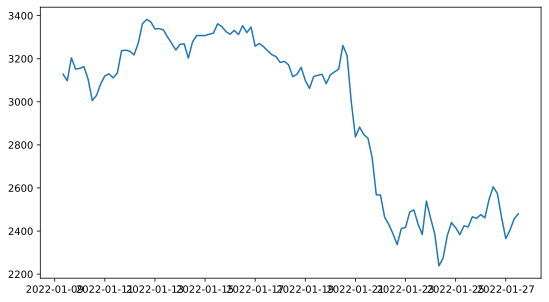

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize=(9, 5))
plt.plot(data['Close'], zorder=0)

# sell, buy = signal_dates()


for xc in buy:
    plt.axvline(x=xc,color='g')

for xc in sell:
    plt.axvline(x=xc,color='r')


# draw the last call only
# b = buy[-1]
# plt.axvline(x=b,color='g')

# s = sell[-1]
# plt.axvline(x=s,color='r')
plt.title(symbol)
# plt.legend()
plt.xticks(rotation='vertical', fontsize = 5)

# plt.gcf().autofmt_xdate()


plt.show()



In [ ]:
s=ta.ha(data['Open'],data['High'],data['Low'],data['Close'])


In [ ]:
# l = [0,2,3,5,8,7,4,5,2,1,5]

# dff = pd.DataFrame(l[:-2])

# dff